# Titanic Survival Prediction

### Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex	

Age	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

**pclass**: A proxy for socio-economic status (SES)

- 1st = Upper

- 2nd = Middle

- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Training Dataset

In [2]:
train = pd.read_csv('train.csv')
titanic_train = train.copy()
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Handling

#### Dropping the unnecessary columns

In [5]:
# dropping "PassengerId" column as of no use during analysis
titanic_train.drop('PassengerId', axis=1, inplace=True)

#### Handling the missing values

In [6]:
# column wise null values
titanic_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# column wise null values(in percentage)
round((titanic_train.isnull().sum()/titanic_train.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

As it can be observed that there are three columns with null values with **'Cabin' having highest null value percentage(i.e. 77%)** with it so, it would be better to **remove the column 'Cabin'**.

In [8]:
# dropping the column 'Cabin'
titanic_train.drop('Cabin', axis=1, inplace=True)

# column wise null values(in percentage)
round((titanic_train.isnull().sum()/titanic_train.shape[0])*100,2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Embarked     0.22
dtype: float64

Now, we have only **two columns** left with missing values with, therefore it would be better to **impute them**.

#### Impute the missing values

In [9]:
# imputing the column 'Embarked' with the mode
titanic_train.Embarked.fillna(titanic_train.Embarked.mode()[0], inplace=True)

In [10]:
# Imputation for 'Age' column
titanic_train.Age.fillna(titanic_train.Age.median(), inplace=True)

# checking the dataset
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [11]:
# column wise null values(in percentage)
round((titanic_train.isnull().sum()/titanic_train.shape[0])*100,2)

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

There are no more missing values.

#### Duplicates among rows

In [12]:
# Checking for duplicates
titanic_train.duplicated().sum()

0

This shows there are no duplicates.

## Data Analysis and Visualisation

### Survived

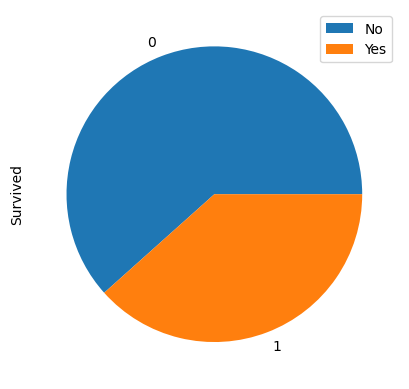

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [13]:
titanic_train.Survived.value_counts(normalize=True).plot.pie()
plt.legend(['No', 'Yes'])
plt.show()
print(titanic_train.Survived.value_counts(normalize=True))

### Sex 

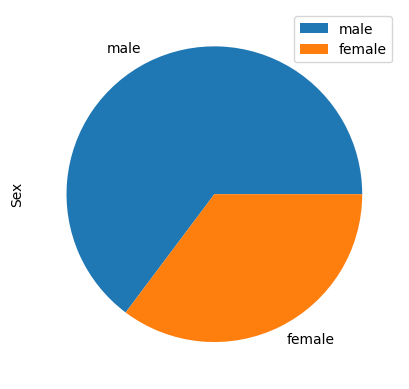

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [14]:
titanic_train.Sex.value_counts(normalize=True).plot.pie()
plt.legend(['male', 'female'])
plt.show()
titanic_train.Sex.value_counts(normalize=True)

### Count of survivors among different Sex

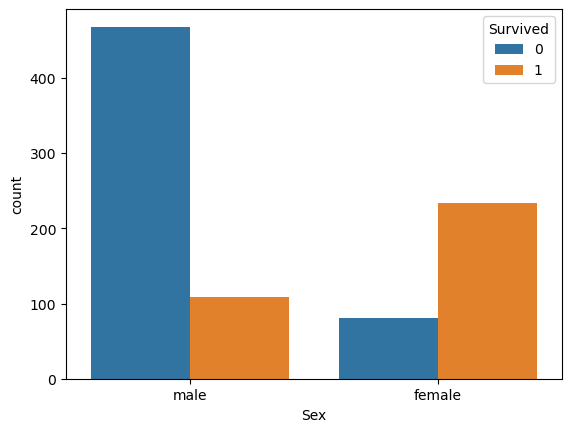

In [15]:
sns.countplot(data=titanic_train, x='Sex', hue='Survived')
plt.show()

According to afformentioned plot, the **no. of survivors are more in females as compared to males.**

### Distribution of Survivors among different Age densities

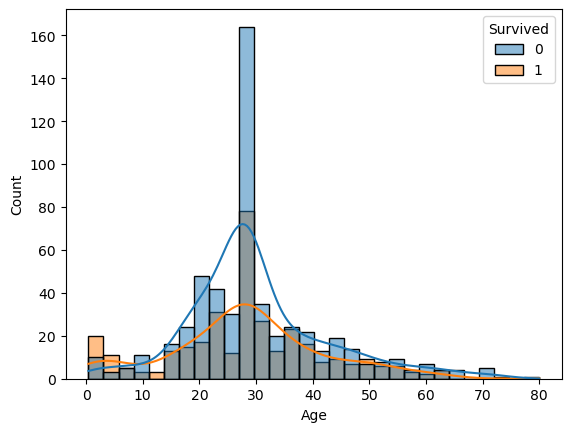

In [16]:
sns.histplot(data=titanic_train, x='Age', kde=True, hue='Survived')
plt.show()

The aforementioned plot shows that the **distribution** of both **Survivors and Non-Survivors are higher** among the **age groups of 20 to 40** although the density of Non-survivors are much higher than the survivors in that age group.

### Passenger class

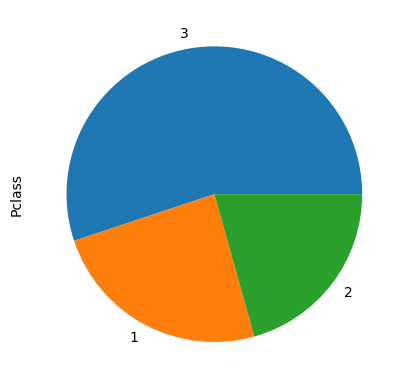

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


In [17]:
titanic_train.Pclass.value_counts(normalize=True).plot.pie()
plt.show()
print(titanic_train.Pclass.value_counts(normalize=True))

The population of the passengers of the **third class are higher** than of the other classes.

#### Distribution of Survivors among different Passenger classes

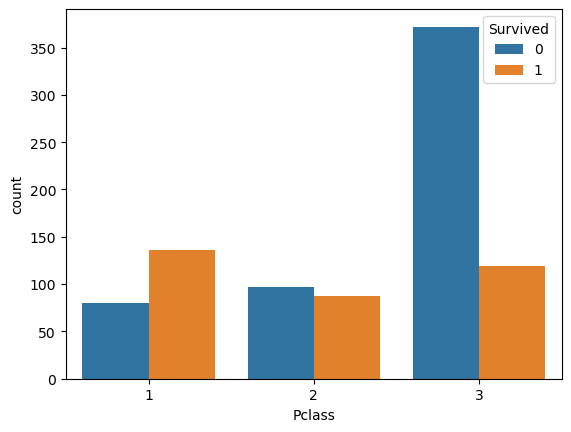

In [18]:
sns.countplot(data=titanic_train, x='Pclass', hue='Survived')
plt.show()

The above plot depicts that the no. of **survivors are higher** in the case of **First class** passengers and no.of **non-survivors are higher** among the **Third class** passengers, therefore the **High earning passengers had higher chances of survival than the Low earning ones.**

### Port of Embarkation 

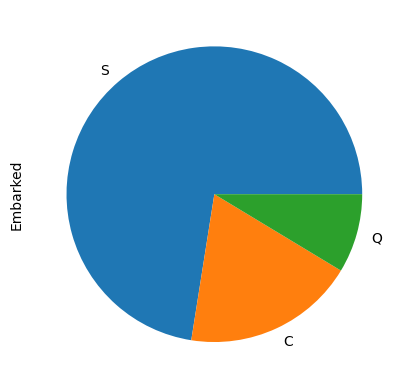

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


In [19]:
titanic_train.Embarked.value_counts(normalize=True).plot.pie()
plt.show()
print(titanic_train.Embarked.value_counts(normalize=True))

#### Distribution of survivors among different ports of embarkation

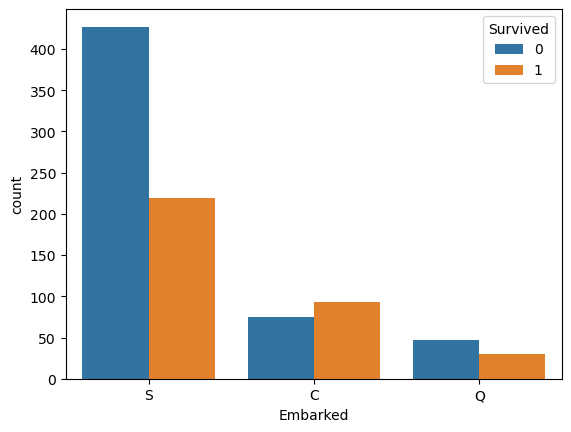

In [20]:
sns.countplot(data=titanic_train, x='Embarked', hue='Survived')
plt.show()

This shows that high population of survivors and non-survivors are from Southampton(S).

### Creating Dummies

In [21]:
dummy = pd.get_dummies(titanic_train[['Sex', 'Embarked']])

# merging the dummies with the original dataset
titanic_train = pd.concat([titanic_train, dummy], axis=1)

In [22]:
#checking the training dataset
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,1,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,1,0,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,1,0,0


#### Dropping unnecessary columns

In [23]:
# droping columns
titanic_train.drop(['Name', 'Sex', 'Embarked', 'Fare', 'Ticket'], axis=1, inplace=True)

# checking the dataset again
titanic_train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1
5,0,3,28.0,0,0,0,1,0,1,0
6,0,1,54.0,0,0,0,1,0,0,1
7,0,3,2.0,3,1,0,1,0,0,1
8,1,3,27.0,0,2,1,0,0,0,1
9,1,2,14.0,1,0,1,0,1,0,0


### Heatmap

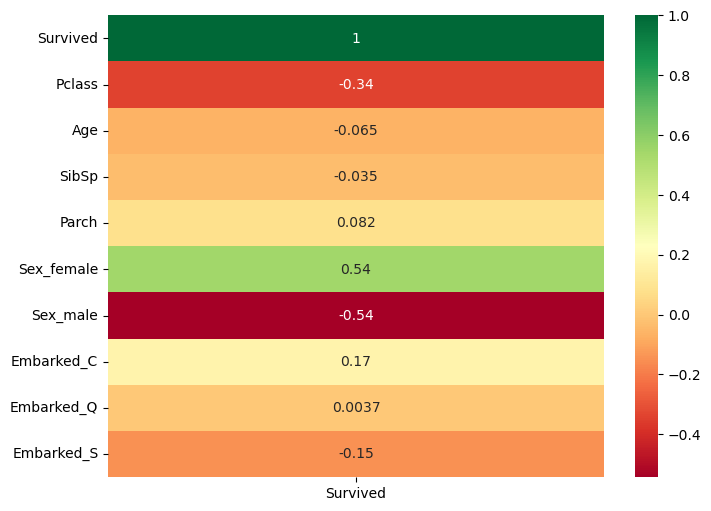

In [24]:
plt.figure(figsize=[8,6])
sns.heatmap(titanic_train.corr()[['Survived']], cmap='RdYlGn', annot=True)
plt.show()

### Split of train data into X and Y

In [25]:
# Splitting the training data into X and y
X = titanic_train.drop('Survived', axis=1)
y = titanic_train.Survived
y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

## Logistic Regression

### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

# Split of X and into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [27]:
print('X_train_shape= ', X_train.shape,'\n'
     'X_test_shape= ', X_test.shape)

X_train_shape=  (623, 9) 
X_test_shape=  (268, 9)


### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

# scaling the features
scaler = StandardScaler()
X_train[['Pclass', 'Age', 'Parch', 'SibSp']] = scaler.fit_transform(X_train[['Pclass', 'Age', 'Parch', 'SibSp']])
X_train.head(10)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
69,0.843816,-0.283098,1.298708,-0.463118,0,1,0,0,1
85,0.843816,0.261554,2.189781,-0.463118,1,0,0,0,1
794,0.843816,-0.360906,-0.483440,-0.463118,0,1,0,0,1
161,-0.345544,0.806207,-0.483440,-0.463118,1,0,0,0,1
815,-1.534905,-0.127483,-0.483440,-0.463118,0,1,0,0,1
516,-0.345544,0.339362,-0.483440,-0.463118,1,0,0,0,1
299,-1.534905,1.584282,-0.483440,0.785898,1,0,1,0,0
454,0.843816,-0.127483,-0.483440,-0.463118,0,1,0,0,1
59,0.843816,-1.450211,3.971928,2.034914,0,1,0,0,1
879,-1.534905,2.051127,-0.483440,0.785898,1,0,1,0,0


### Running first model

In [29]:
import statsmodels.api as sm
logm = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.80
Date:                Wed, 02 Aug 2023   Deviance:                       539.60
Time:                        10:58:54   Pearson chi2:                     644.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1208      0.083     -1.450      0.147      -0.284       0.042
Pclass        -0.9644      0.127     -7.593      0.000      -1.213      -0.715
Age           -0.4992      0.125     -3.991      0.000      -0.744      -0.254
SibSp         -0.2904      0.138     -2.101      0.036      -0.561      -0.020
Parch         -0.1669      0.119     -1.402      0.161      -0.400       0.066
Sex_female     1.3872      0.131     10.562      0.000       1.130       1.645
Sex_male      -1.5080      0.130    -11.608      0.000      -1.763      -1.253
Embarked_C     0.2645      0.221      1.198      0.231      -0.168       0.697
Embarked_Q    -0.1758      0.291     -0.605      0.545      -0.746       0.394
Embarked_S    -0.2094      0.155     -1.355      0.175      -0.512       0.093
==============================================================================
"""

### Feature Selection using RFE

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [31]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train,y_train)

In [32]:
rfe.support_

array([ True, False, False, False,  True,  True,  True, False, False])

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Age', False, 2),
 ('SibSp', False, 3),
 ('Parch', False, 4),
 ('Sex_female', True, 1),
 ('Sex_male', True, 1),
 ('Embarked_C', True, 1),
 ('Embarked_Q', False, 6),
 ('Embarked_S', False, 5)]

In [34]:
cols = X_train.columns[rfe.support_]
cols

Index(['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C'], dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S'], dtype='object')

### Running second model after using RFE

In [36]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      619
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -281.68
Date:                Wed, 02 Aug 2023   Deviance:                       563.35
Time:                        10:58:54   Pearson chi2:                     647.
No. Iterations:                    30   Pseudo R-squ. (CS):             0.3415
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2766      0.078     -3.533      0.000      -0.430      -0.123
Pclass        -0.7843      0.111     -7.091      0.000      -1.001      -0.568
Sex_female     1.2143      0.122      9.983      0.000       0.976       1.453
Sex_male      -1.4909      0.116    -12.867      0.000      -1.718      -1.264
Embarked_C     0.5556      0.274      2.026      0.043       0.018       1.093
==============================================================================
"""

#### Creating the predictions

In [37]:
y_train_pred = logm2.fit().predict(X_train_sm)
y_train_pred[:10]

69     0.080960
85     0.568514
794    0.080960
161    0.770057
815    0.362695
516    0.770057
299    0.936854
454    0.080960
59     0.080960
879    0.936854
dtype: float64

In [38]:
# reshaping into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08096023, 0.56851402, 0.08096023, 0.77005715, 0.36269515,
       0.77005715, 0.93685406, 0.08096023, 0.08096023, 0.93685406])

In [39]:
# creating a dataframe 
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survival_prob':y_train_pred})
y_train_pred_final['PassengerId'] = train.PassengerId[:624]
y_train_pred_final.head(10)

,Survived,Survival_prob,PassengerId
0,0,0.080960,1
1,1,0.568514,2
2,0,0.080960,3
3,1,0.770057,4
4,0,0.362695,5
5,1,0.770057,6
6,1,0.936854,7
7,0,0.080960,8
8,0,0.080960,9
9,1,0.936854,10


#### Creating new column for the predictions

In [40]:
# Surviv_pred = 1 if Survival prob>0.5 else 0
y_train_pred_final['Surviv_pred'] = y_train_pred_final.Survival_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Survived,Survival_prob,PassengerId,Surviv_pred
0,0,0.080960,1,0
1,1,0.568514,2,1
2,0,0.080960,3,0
3,1,0.770057,4,1
4,0,0.362695,5,0
5,1,0.770057,6,1
6,1,0.936854,7,1
7,0,0.080960,8,0
8,0,0.080960,9,0
9,1,0.936854,10,1


#### VIF checking

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[cols].values, i) for i in range(X_train_sm[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Sex_male,1.14
1,Sex_female,1.12
0,Pclass,1.09
3,Embarked_C,1.08


None of the features have high VIF 

#### Metrics

In [42]:
# confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Surviv_pred)
confusion

array([[331,  59],
       [ 72, 161]], dtype=int64)

In [43]:
# Predicted     not_survived    survived
# Actual
# not_survived        331     59
# survived            72      161
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [44]:
# accuracy
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Surviv_pred)

0.7897271268057785

In [45]:
# sensitivity 
sensitivty = TP / float(TP+FN)
sensitivty

0.6909871244635193

In [46]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.8487179487179487

In [47]:
#  false postive rate(FPR)
FPR = FP/ float(TN+FP)
FPR

0.15128205128205127

In [48]:
# positive predictive value(PPV)
PPV = TP / float(TP+FP)
PPV

0.7318181818181818

In [49]:
# Negative predictive value(NPV)
NPV= TN / float(TN+ FN)
NPV

0.8213399503722084

#### Plotting the ROC Curve

In [50]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

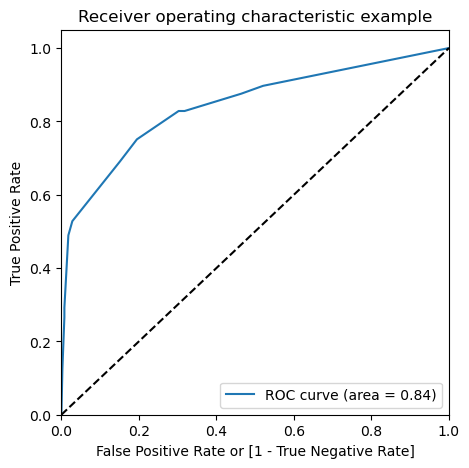

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Survived, 
                                         y_train_pred_final.Survival_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survival_prob)

#### Finding optimal cutoff

In [52]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final.Survival_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head(10)

,Survived,Survival_prob,PassengerId,Surviv_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.080960,1,0,1,0,0,0,0,0,0,0,0,0
1,1,0.568514,2,1,1,1,1,1,1,1,0,0,0,0
2,0,0.080960,3,0,1,0,0,0,0,0,0,0,0,0
3,1,0.770057,4,1,1,1,1,1,1,1,1,1,0,0
4,0,0.362695,5,0,1,1,1,1,0,0,0,0,0,0
5,1,0.770057,6,1,1,1,1,1,1,1,1,1,0,0
6,1,0.936854,7,1,1,1,1,1,1,1,1,1,1,1
7,0,0.080960,8,0,1,0,0,0,0,0,0,0,0,0
8,0,0.080960,9,0,1,0,0,0,0,0,0,0,0,0
9,1,0.936854,10,1,1,1,1,1,1,1,1,1,1,1


In [53]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.373997,1.000000,0.000000
0.1,0.1,0.635634,0.896996,0.479487
0.2,0.2,0.736758,0.828326,0.682051
0.3,0.3,0.746388,0.828326,0.697436
0.4,0.4,0.784912,0.751073,0.805128
0.5,0.5,0.789727,0.690987,0.848718
0.6,0.6,0.805778,0.527897,0.971795
0.7,0.7,0.797753,0.489270,0.982051
0.8,0.8,0.730337,0.291845,0.992308
0.9,0.9,0.670947,0.124464,0.997436


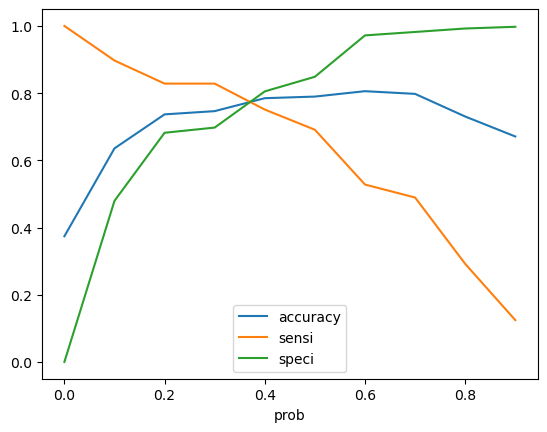

In [54]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The **Optimal cutoff** can be seen somewhere **b/w 0.3 and 0.4** so, let's calculate for more refined value.

In [55]:
# creating columns with different probability cutoffs b/w 0.3 and 0.4 
nums = [0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]
for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Survival_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Survived,Survival_prob,PassengerId,Surviv_pred,0.0,0.1,0.2,0.3,0.4,0.5,...,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
0,0,0.080960,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.568514,2,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2,0,0.080960,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.770057,4,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,0,0.362695,5,0,1,1,1,1,0,0,...,0,1,1,1,1,1,1,0,0,0
5,1,0.770057,6,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
6,1,0.936854,7,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,0,0.080960,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.080960,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0.936854,10,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [56]:
# calculate accuracy sensitivity and specificity for probability cutoffs b/w 0.3 and 0.4
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

for i in nums:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.30,0.30,0.746388,0.828326,0.697436
0.31,0.31,0.746388,0.828326,0.697436
0.32,0.32,0.746388,0.828326,0.697436
0.33,0.33,0.746388,0.828326,0.697436
0.34,0.34,0.746388,0.828326,0.697436
0.35,0.35,0.746388,0.828326,0.697436
0.36,0.36,0.746388,0.828326,0.697436
0.37,0.37,0.784912,0.751073,0.805128
0.38,0.38,0.784912,0.751073,0.805128
0.39,0.39,0.784912,0.751073,0.805128


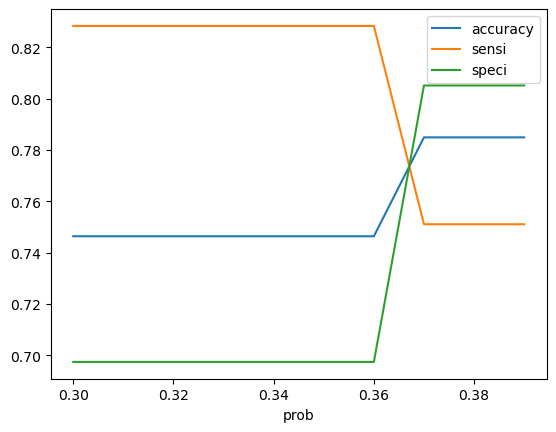

In [57]:
# plot accuracy, sensitivity and specificity for various probabilities b/w 0.3 and 0.4
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The **optimal cutoff** seems to converge at **0.365**.

In [58]:
# final cutoff = 0.365
y_train_pred_final['final_Surv_pred'] = y_train_pred_final.Survival_prob.map(lambda x: 1 if x > 0.365 else 0)
y_train_pred_final.head(10)

,Survived,Survival_prob,PassengerId,Surviv_pred,0.0,0.1,0.2,0.3,0.4,0.5,...,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_Surv_pred
0,0,0.080960,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.568514,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,0.080960,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.770057,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0.362695,5,0,1,1,1,1,0,0,...,1,1,1,1,1,1,0,0,0,0
5,1,0.770057,6,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,0.936854,7,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,0,0.080960,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.080960,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0.936854,10,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Checking the metrics again

In [59]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_Surv_pred)

0.7849117174959872

In [60]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_Surv_pred)
confusion2

array([[314,  76],
       [ 58, 175]], dtype=int64)

In [61]:
# Predicted   not_survived    survived
# Actual
# not_survived        314     76
# survived            58      175
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [62]:
# sensitivity 
sensitivty = TP / float(TP+FN)
sensitivty

0.7510729613733905

In [63]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.8051282051282052

In [64]:
#  false postive rate(FPR)
FPR = FP/ float(TN+FP)
FPR

0.19487179487179487

In [65]:
# positive predictive value(PPV)
PPV = TP / float(TP+FP)
PPV

0.6972111553784861

In [66]:
# Negative predictive value(NPV)
NPV= TN / float(TN+ FN)
NPV

0.8440860215053764

#### Precision and Recall

In [67]:
# using sklearn utilities
from sklearn.metrics import precision_score, recall_score

# precision
precision_score(y_train_pred_final.Survived, y_train_pred_final.final_Surv_pred)

0.6972111553784861

In [68]:
# recall
recall_score(y_train_pred_final.Survived, y_train_pred_final.final_Surv_pred)

0.7510729613733905

### Model Testing on X_test data

In [69]:
# checking testing data
X_test.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
205,3,2.0,0,1,1,0,0,0,1
44,3,19.0,0,0,1,0,0,1,0
821,3,27.0,0,0,0,1,0,0,1
458,2,50.0,0,0,1,0,0,0,1
795,2,39.0,0,0,0,1,0,0,1


In [70]:
# Scaling
X_test[['Pclass','Age','Parch', 'SibSp']] = scaler.transform(X_test[['Pclass','Age','Parch', 'SibSp']])
X_test.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
205,0.843816,-2.150478,-0.48344,0.785898,1,0,0,0,1
44,0.843816,-0.827751,-0.48344,-0.463118,1,0,0,1,0
821,0.843816,-0.205291,-0.48344,-0.463118,0,1,0,0,1
458,-0.345544,1.584282,-0.48344,-0.463118,1,0,0,0,1
795,-0.345544,0.728399,-0.48344,-0.463118,0,1,0,0,1


In [71]:
# feature selection using rfe columns
X_test = X_test[cols]
X_test.head()

,Pclass,Sex_female,Sex_male,Embarked_C
205,0.843816,1,0,0
44,0.843816,1,0,0
821,0.843816,0,1,0
458,-0.345544,1,0,0
795,-0.345544,0,1,0


#### Predictons on X_test data

In [72]:
# predictions
y_test_pred = logm2.fit().predict(sm.add_constant(X_test))

# Converting predictions in form of dataframe
y_pred = pd.DataFrame(y_test_pred)
y_pred.head(10)

,0
205,0.568514
44,0.568514
821,0.080960
458,0.770057
795,0.182944
118,0.497979
424,0.080960
678,0.568514
269,0.894870
229,0.568514


In [73]:
# Converting y_test into dataframe
y_test = pd.DataFrame(y_test)

# Removing index from both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test and y_pred
y_test_pred_final = pd.concat([y_test, y_pred],axis=1)
y_test_pred_final.head(10)

,Survived,0
0,0,0.568514
1,1,0.568514
2,1,0.080960
3,1,0.770057
4,0,0.182944
5,0,0.497979
6,0,0.080960
7,0,0.568514
8,1,0.894870
9,0,0.568514


In [74]:
# Renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns={ 0 : 'Surviv_prob'})

# taking perspective of sensivity-specificity, threshold = 0.365
y_test_pred_final['Surviv_test_pred'] = y_test_pred_final.Surviv_prob.map(lambda x: 1 if x > 0.365 else 0)  
y_test_pred_final.head()

,Survived,Surviv_prob,Surviv_test_pred
0,0,0.568514,1
1,1,0.568514,1
2,1,0.080960,0
3,1,0.770057,1
4,0,0.182944,0


In [75]:
# accuracy
metrics.accuracy_score(y_test_pred_final.Survived, y_test_pred_final.Surviv_test_pred)

0.7611940298507462

In [76]:
# confusion matrix
confusion3 = metrics.confusion_matrix(y_test_pred_final.Survived, y_test_pred_final.Surviv_test_pred)
confusion3

array([[129,  30],
       [ 34,  75]], dtype=int64)

In [77]:
# Predicted   not_survived    survived
# Actual
# not_survived        314     76
# survived            58      175
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [78]:
# sensitivity 
sensitivty = TP / float(TP+FN)
sensitivty

0.6880733944954128

In [79]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.8113207547169812

In [80]:
#  false postive rate(FPR)
FPR = FP/ float(TN+FP)
FPR

0.18867924528301888

In [81]:
# positive predictive value(PPV)
PPV = TP / float(TP+FP)
PPV

0.7142857142857143

In [82]:
# Negative predictive value(NPV)
NPV= TN / float(TN+ FN)
NPV

0.7914110429447853

#### Precision and Recall

In [83]:
# precision
precision_score(y_test_pred_final.Survived, y_test_pred_final.Surviv_test_pred)

0.7142857142857143

In [84]:
# recall
recall_score(y_test_pred_final.Survived, y_test_pred_final.Surviv_test_pred)

0.6880733944954128

### Metrics of X_train and X_test data(in percent)

#### X_train
- Accurcacy: 78.4
- Precision: 69.7
- Recall: 75.1
    
#### X_test
- Accurcacy: 76.1
- Precision: 71.4
- Recall: 68.8

### Predictions on Testing Data

In [96]:
# reading the test data
test = pd.read_csv('test.csv')
titanic_test = test.copy()
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
# Scaling
titanic_test[['Pclass','Age','Parch', 'SibSp']] = scaler.transform(titanic_test[['Pclass','Age','Parch', 'SibSp']])
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0.843816,"Kelly, Mr. James",male,0.378266,-0.483440,-0.463118,330911,7.8292,NaN,Q
1,893,0.843816,"Wilkes, Mrs. James (Ellen Needs)",female,1.350860,0.407634,-0.463118,363272,7.0000,NaN,S
2,894,-0.345544,"Myles, Mr. Thomas Francis",male,2.517972,-0.483440,-0.463118,240276,9.6875,NaN,Q
3,895,0.843816,"Wirz, Mr. Albert",male,-0.205291,-0.483440,-0.463118,315154,8.6625,NaN,S
4,896,0.843816,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.594328,0.407634,0.785898,3101298,12.2875,NaN,S


In [88]:
# creating dummies
dummy1 = pd.get_dummies(titanic_test[['Sex', 'Embarked']])

# merging the dummies with the original dataset
titanic_test = pd.concat([titanic_test, dummy1], axis=1)

In [89]:
# feature selection using rfe columns
titanic_test = titanic_test[cols]
titanic_test.head()

,Pclass,Sex_female,Sex_male,Embarked_C
0,0.843816,0,1,0
1,0.843816,1,0,0
2,-0.345544,0,1,0
3,0.843816,0,1,0
4,0.843816,1,0,0


#### Predictons on Testing data

In [94]:
# predictions
y_pred = logm2.fit().predict(sm.add_constant(titanic_test))

# Converting predictions in form of dataframe
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0.080960
1,0.568514
2,0.182944
3,0.080960
4,0.568514
...,...
413,0.080960
414,0.936854
415,0.080960
416,0.080960


In [93]:
# Renaming the column 
y_pred = y_pred.rename(columns={ 0 : 'Surviv_prob'})

# taking perspective of sensivity-specificity, threshold = 0.365
y_pred['Surviv_test_pred'] = y_pred.Surviv_prob.map(lambda x: 1 if x > 0.365 else 0)  
y_pred

,Surviv_prob,Surviv_test_pred
0,0.080960,0
1,0.568514,1
2,0.182944,0
3,0.080960,0
4,0.568514,1
...,...,...
413,0.080960,0
414,0.936854,1
415,0.080960,0
416,0.080960,0


In [92]:
# Submissions
output = pd.DataFrame({'PassengerId': test.PassengerId[:418], 'Survived': y_pred.Surviv_test_pred})
output.to_csv('Titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
